# MMC Laboratorium 4

Autor: Jakub Ostrzołek

## Zadanie 5

$$I = \int_0^{\pi/2} \sin x \: dx = 1$$

### Definicja eksperymentu Monte Carlo w wariancie podstawowym

In [208]:
import numpy as np
from typing import Callable


def monte_carlo_integrate(f: Callable[[float], float], x_lim: tuple[float, float], n_points: int) -> float:
    gen = np.random.default_rng()

    domain_width = x_lim[1] - x_lim[0]
    xs: np.ndarray = gen.random(size=n_points) * domain_width + x_lim[0]
    ys: np.ndarray = np.apply_along_axis(f, 0, xs)
    estimate = ys.mean() * domain_width

    ys_squared: np.ndarray = np.power(ys, 2)
    std_dev = np.sqrt(1 / (n_points - 1) * (ys_squared.mean() - ys.mean() ** 2))
    return (estimate, std_dev)

### Przeprowadzenie szacowania dla różnych liczności próbek

In [209]:
ns = np.logspace(2, 6, 40).astype(int)

result = np.array([monte_carlo_integrate(np.sin, (0, np.pi/2), n) for n in ns])

ys_estimate = result[:, 0].flatten()
std_devs = result[:, 1].flatten()
errors = np.abs(ys_estimate - 1)
display(np.stack([ns, ys_estimate, std_devs, errors], axis=1))

array([[1.00000000e+02, 1.05928658e+00, 2.83472303e-02, 5.92865795e-02],
       [1.26000000e+02, 1.02297834e+00, 2.80042069e-02, 2.29783391e-02],
       [1.60000000e+02, 9.89542778e-01, 2.44901516e-02, 1.04572215e-02],
       [2.03000000e+02, 9.97930235e-01, 2.05707702e-02, 2.06976506e-03],
       [2.57000000e+02, 1.01495426e+00, 1.88206536e-02, 1.49542636e-02],
       [3.25000000e+02, 9.85884424e-01, 1.70680503e-02, 1.41155763e-02],
       [4.12000000e+02, 1.00266628e+00, 1.48468804e-02, 2.66627966e-03],
       [5.22000000e+02, 9.99517797e-01, 1.36525009e-02, 4.82203219e-04],
       [6.61000000e+02, 1.01021448e+00, 1.22089127e-02, 1.02144756e-02],
       [8.37000000e+02, 9.95148266e-01, 1.05401086e-02, 4.85173357e-03],
       [1.06000000e+03, 1.01367775e+00, 9.57603559e-03, 1.36777547e-02],
       [1.34300000e+03, 9.87938719e-01, 8.55710462e-03, 1.20612813e-02],
       [1.70100000e+03, 1.00023055e+00, 7.51601962e-03, 2.30547466e-04],
       [2.15400000e+03, 1.00910885e+00, 6.59500978e

### Definicja eksperymentu Monte Carlo z próbkowaniem ważonym

In [210]:
import numpy as np
from typing import Callable, Generator, Any, NoReturn
from itertools import islice


def random_from_distribution_elimination(
    distribution: Callable[[float], float], x_lim: tuple[float, float], y_max: float
) -> Generator[float, Any, NoReturn]:
    gen = np.random.default_rng()
    lim = np.array([x_lim, (0, y_max)])
    scale = lim[:, 1] - lim[:, 0]
    translation = lim[:, 0]
    while True:
        [x, y] = gen.random(2) * scale + translation
        if y <= distribution(x):
            yield x


def monte_carlo_integrate_importance_sampling(
    f: Callable[[float], float],
    distribution: Callable[[float], float],
    distribution_max: float,
    x_lim: tuple[float, float],
    n_points: int,
) -> float:
    gen = random_from_distribution_elimination(distribution, x_lim, distribution_max)
    xs = np.array([x for x in islice(gen, n_points)])

    ps: np.ndarray = np.apply_along_axis(distribution, 0, xs)
    ys: np.ndarray = np.apply_along_axis(f, 0, xs)
    estimate = (ys/ps).mean()

    ys_squared: np.ndarray = np.power(ys/ps, 2)
    std_dev = np.sqrt(1 / (n_points - 1) * (ys_squared.mean() - estimate ** 2))
    return (estimate, std_dev)

### Przeprowadzenie szacowania dla różnych liczności próbek

In [211]:
def g(x: float) -> float:
    return 8 * x / np.power(np.pi, 2)


result_is = np.array(
    [
        monte_carlo_integrate_importance_sampling(
            f=np.sin,
            distribution=g,
            distribution_max=g(np.pi / 2),
            x_lim=(0, np.pi / 2),
            n_points=n,
        )
        for n in ns
    ]
)

ys_estimate_is = result_is[:, 0].flatten()
std_devs_is = result_is[:, 1].flatten()
errors_is = np.abs(ys_estimate_is - 1)
display(np.stack([ns, ys_estimate_is, std_devs_is, errors_is], axis=1))

array([[1.00000000e+02, 9.73113740e-01, 1.31690014e-02, 2.68862604e-02],
       [1.26000000e+02, 1.00042263e+00, 1.16864236e-02, 4.22627970e-04],
       [1.60000000e+02, 9.97376306e-01, 1.02277098e-02, 2.62369440e-03],
       [2.03000000e+02, 1.01096569e+00, 8.96717024e-03, 1.09656941e-02],
       [2.57000000e+02, 9.91855071e-01, 8.15596215e-03, 8.14492892e-03],
       [3.25000000e+02, 1.00501777e+00, 7.05125324e-03, 5.01777201e-03],
       [4.12000000e+02, 1.00361833e+00, 6.15419070e-03, 3.61833143e-03],
       [5.22000000e+02, 1.00171410e+00, 5.61193640e-03, 1.71409731e-03],
       [6.61000000e+02, 9.96672725e-01, 4.97357527e-03, 3.32727530e-03],
       [8.37000000e+02, 9.99015794e-01, 4.58498378e-03, 9.84206268e-04],
       [1.06000000e+03, 9.97815084e-01, 3.93919441e-03, 2.18491588e-03],
       [1.34300000e+03, 1.00534361e+00, 3.56454222e-03, 5.34361113e-03],
       [1.70100000e+03, 9.99575120e-01, 3.13766654e-03, 4.24879723e-04],
       [2.15400000e+03, 9.98571039e-01, 2.78852335e

ValueError: x and y must be the same size

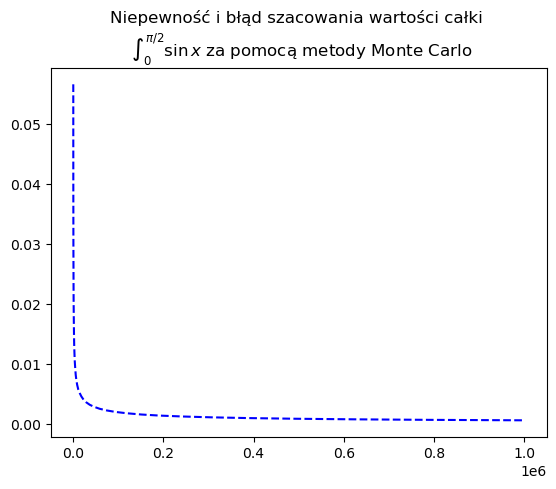

In [212]:
from matplotlib import pyplot as plt

plt.title("Niepewność i błąd szacowania wartości całki \n $\int_0^{\pi/2} \sin x$ za pomocą metody Monte Carlo")
plt.plot(ns, 2 * std_devs, "b--", label="$\sigma$ metoda podstawowa")
plt.scatter(ns, errors_sobol, 2, "b", label="$|\Delta|$ metoda podstawowa")
plt.plot(ns, 2 * std_devs_is, "r--", label="$\sigma$ próbkowanie ważone")
plt.scatter(ns, errors_is, 2, "r", label="$|\Delta|$ próbkowanie ważone")
plt.xlabel("Liczności próby $N$")
plt.xscale("log")
plt.ylabel("Niepewność szacowania $2 \cdot \sigma$ \n Błąd bezwzględny $|\Delta|$")
plt.yscale("log")
plt.legend(loc="best")
plt.show()

Zarówno dla metody podstawowej, jak i z próbkowaniem ważonym widać, że:

* niepewność szacowania maleje liniowo, ze współczynnikiem liniowym ok. $-1/2$ (w skali logarytmicznej),
* znaczna większość błędów szacowania znajduje się poniżej niepewności szacowania,
* niektóre błędy szacowania znajdują się powyżej niepewności szacowania.

Niepewność szacowania jest to tak na prawdę $\sim 95$ percentyl w rozkładzie błędu szacowania (prawo dwóch sigm w rozkładzie normalnym), a zatem ostatnie dwie obserwacje są zgodne z oczekiwaniami.

Ponadto widać, że metoda z próbkowaniem ważonym dla takiej samej liczności próbek posiada mniejszą niepewność szacowania (o ok. $0.5$ dekady). Wynika to z faktu, że częściej generujemy punkty mające większy udział w szacowaniu wartości estymowanej statystyki. Mniejsza niepewność jest jednak okupiona dłuższym czasem obliczeń, ze względu na dodatkowy koszt generowania liczby losowej z rozkładu innego niż rozkład równomierny. Prawdopodobnie przy lepszej (szybszej) implmentacji efekt byłby mniej zauważalny.

## Zadanie 7



$$I = \int_{0}^{\pi} \sin x \,\mathrm{d}x = 2$$

### Definicja eksperymentu Monte Carlo w wariancie orzeł-reszka

In [ ]:
import numpy as np


def monte_carlo_integrate_coin_flip(
    f: Callable[[float], float],
    x_lim: tuple[float, float],
    y_lim: tuple[float, float],
    n_points: int,
    generator: np.random.Generator,
) -> float:
    lim = np.array([x_lim, y_lim])
    scale = lim[:, 1] - lim[:, 0]
    translation = lim[:, 0]

    pts: np.ndarray = generator.random(n_points * 2).reshape((n_points, 2)) * scale + translation
    xs, ys = pts[:, 0], pts[:, 1]
    real_ys = np.apply_along_axis(f, 0, xs) 
    is_under: np.ndarray = ys <= real_ys
    hit_ratio = is_under.mean()
    estimate = hit_ratio * np.prod(scale)

    return estimate

### Wielokrotne przeprowadzenie z generatorem pseudo-losowym

In [ ]:
N = 1000

ys_estimate = np.array(
    [
        monte_carlo_integrate_coin_flip(
            f=np.sin,
            x_lim=(0, np.pi),
            y_lim=(0, 1),
            n_points=N,
            generator = np.random.default_rng(),
        )
        for _ in range(100)
    ]
)

errors = np.abs(ys_estimate - 2)
display(np.stack([ys_estimate, errors], axis=1))

ValueError: all input arrays must have the same shape

### Wielokrotne przeprowadzenie z generatorem quasi-losowym

In [ ]:
from scipy.stats.qmc import Sobol

ys_estimate_sobol = np.array(
    [
        monte_carlo_integrate_coin_flip(
            f=np.sin,
            x_lim=(0, np.pi),
            y_lim=(0, 1),
            n_points=N,
            generator=Sobol(d=1, scramble=False),
        )
        for _ in range(100)
    ]
)

errors_sobol = np.abs(ys_estimate_sobol - 2)
display(np.stack([ys_estimate_sobol, errors_sobol], axis=1))

array([1.84411489, 1.84411489, 1.84411489, 1.84411489, 1.84411489,
       1.84411489, 1.84411489, 1.84411489, 1.84411489, 1.84411489,
       1.84411489, 1.84411489, 1.84411489, 1.84411489, 1.84411489,
       1.84411489, 1.84411489, 1.84411489, 1.84411489, 1.84411489,
       1.84411489, 1.84411489, 1.84411489, 1.84411489, 1.84411489,
       1.84411489, 1.84411489, 1.84411489, 1.84411489, 1.84411489,
       1.84411489, 1.84411489, 1.84411489, 1.84411489, 1.84411489,
       1.84411489, 1.84411489, 1.84411489, 1.84411489, 1.84411489,
       1.84411489, 1.84411489, 1.84411489, 1.84411489, 1.84411489,
       1.84411489, 1.84411489, 1.84411489, 1.84411489, 1.84411489,
       1.84411489, 1.84411489, 1.84411489, 1.84411489, 1.84411489,
       1.84411489, 1.84411489, 1.84411489, 1.84411489, 1.84411489,
       1.84411489, 1.84411489, 1.84411489, 1.84411489, 1.84411489,
       1.84411489, 1.84411489, 1.84411489, 1.84411489, 1.84411489,
       1.84411489, 1.84411489, 1.84411489, 1.84411489, 1.84411

array([0.15588511, 0.15588511, 0.15588511, 0.15588511, 0.15588511,
       0.15588511, 0.15588511, 0.15588511, 0.15588511, 0.15588511,
       0.15588511, 0.15588511, 0.15588511, 0.15588511, 0.15588511,
       0.15588511, 0.15588511, 0.15588511, 0.15588511, 0.15588511,
       0.15588511, 0.15588511, 0.15588511, 0.15588511, 0.15588511,
       0.15588511, 0.15588511, 0.15588511, 0.15588511, 0.15588511,
       0.15588511, 0.15588511, 0.15588511, 0.15588511, 0.15588511,
       0.15588511, 0.15588511, 0.15588511, 0.15588511, 0.15588511,
       0.15588511, 0.15588511, 0.15588511, 0.15588511, 0.15588511,
       0.15588511, 0.15588511, 0.15588511, 0.15588511, 0.15588511,
       0.15588511, 0.15588511, 0.15588511, 0.15588511, 0.15588511,
       0.15588511, 0.15588511, 0.15588511, 0.15588511, 0.15588511,
       0.15588511, 0.15588511, 0.15588511, 0.15588511, 0.15588511,
       0.15588511, 0.15588511, 0.15588511, 0.15588511, 0.15588511,
       0.15588511, 0.15588511, 0.15588511, 0.15588511, 0.15588

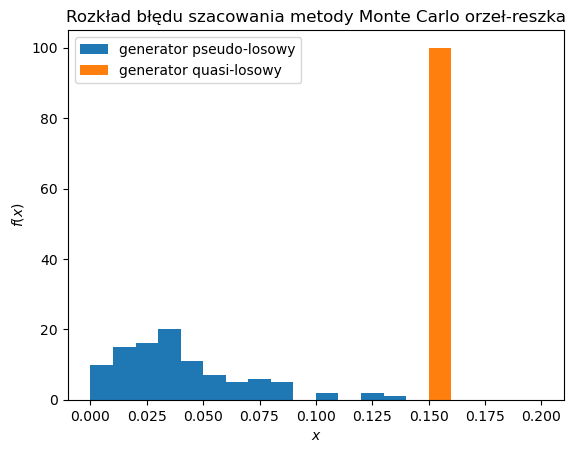

In [ ]:
plt.title("Rozkład błędu szacowania metody Monte Carlo orzeł-reszka")
plt.hist(errors, range=(0, 0.2), density=True, bins=20, label="generator pseudo-losowy")
plt.hist(errors_sobol, range=(0, 0.2), density=True, bins=20, label="generator quasi-losowy")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend(loc="best")
plt.show()

Błąd dla generatora pseudo-losowego posiada jakiś losowy rozkład o wielu różnych wartościach. Błąd dla generatora quasi-losowego dla danego eksperymentu może przyjąć tylko jedną wartość.

Wynika do z faktu, że generatory quasi-losowe są stworzone w taki sposób, żeby otrzymanie kolejnej liczby zawsze było przewidywalne i w oczywisty sposób deterministyczne. Głównym zdaniem generatora quasi-losowego jest jak najbardziej równomierne pokrycie przedziału $[0,1)$, a nie generowanie liczb trudnych do przewidzenia. Nie ma sensu więc przeprowadzać wielokrotnie tego samego eksperymentu na generatorze quasi-losowym, bo wyniki będą identyczne.